## Exploratory Data Analysis

In this section, the datasets are examined and explored in detail.

In [1]:
# Import libraries

import numpy as np 
import pandas as pd 
import time
import requests
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
# This library is to allow file handling between mac and win without errors
# Import the merged dataset

from pathlib import Path

df_merge = pd.read_csv('data/weather_train_test.csv')

In [3]:
#data is confirmed to be cleaned and correct
#the missing id belong to the train set as train set did not come with id 

df_merge.isnull().sum()

date                           0
address                        0
species                        0
block                          0
street                         0
trap                           0
addressnumberandstreet         0
latitude                       0
longitude                      0
addressaccuracy                0
nummosquitos              116293
wnvpresent                116293
id                         10506
station                        0
tmax                           0
tmin                           0
tavg                           0
depart                         0
dewpoint                       0
wetbulb                        0
heat                           0
cool                           0
sunrise                        0
sunset                         0
codesum                        0
preciptotal                    0
stnpressure                    0
sealevel                       0
resultspeed                    0
resultdir                      0
avgspeed  

### Split the merged data for EDA

In [4]:
train = df_merge[df_merge['id'].isnull()]
train.shape

(10506, 34)

In [5]:
test = df_merge[df_merge['id'].notnull()]
test.shape

(116293, 34)

### EDA for train set

In [6]:
train.head(2)

date                                            address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  species  block           street  trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              addressnumberandstreet  latitude  longitude  addressaccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   nummosquitos  wnvpresent  id  station  tmax  tmin  tavg  depart  dewpoint  \
0           1.0         0.0 NaN        1    88    60  74.0    21.0        58   
1           1.0         0.0 NaN        1    88    60  74.0    21.0        58   

   wetbulb  heat  cool  sunrise sunset codesum  preciptotal  stnpressure  \
0     65.0     0     9      421   1917   BR HZ          0.0        29.39   
1     65.0     0     9      421   1917   BR HZ          0.0        29.39   

   sealevel  resultspeed  resultdir  avgspeed  year  month  day  
0     30.11          5.8         18       6.5  2007      5   29  
1     30.11          5.8         18       6.5  2007      5   29

In [7]:
# Check for missing values again

missing_stats = []

for col in train.columns:
    missing_stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
stats_df = pd.DataFrame(missing_stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature  Unique_values  Percentage of missing values  \
12                      id              0                         100.0   
0                     date             95                           0.0   
25             preciptotal             44                           0.0   
20                    heat             15                           0.0   
21                    cool             18                           0.0   
22                 sunrise             62                           0.0   
23                  sunset             55                           0.0   
24                 codesum             29                           0.0   
26             stnpressure             52                           0.0   
18                dewpoint             36                           0.0   
27                sealevel             55                           0.0   
28             resultspeed             86                           0.0   
29               resultdir             36                           0.0   
30                avgspeed             84                           0.0   
31                    year              4                           0.0   
32                   month              6                           0.0   
19                 wetbulb             31                           0.0   
17                  depart             36                           0.0   
1                  address            138                           0.0   
16                    tavg             36                           0.0   
15                    tmin             36                           0.0   
14                    tmax             38                           0.0   
13                 station              2                           0.0   
11              wnvpresent              2                           0.0   
10            nummosquitos             50                           0.0   
9          addressaccuracy              4                           0.0   
8                longitude            138                           0.0   
7                 latitude            138                           0.0   
6   addressnumberandstreet            138                           0.0   
5                     trap            136                           0.0   
4                   street            128                           0.0   
3                    block             64                           0.0   
2                  species              7                           0.0   
33                     day             30                           0.0   

    Percentage of values in the biggest category     type  
12                                    100.000000  float64  
0                                       5.244622   object  
25                                     65.229393  float64  
20                                     85.322673    int64  
21                                     18.151532    int64  
22                                      7.015039    int64  
23                                     55.463545   object  
24                                     55.396916   object  
26                                     11.793261  float64  
18                                      6.777080    int64  
27                                      9.013897  float64  
28                                      5.235104  float64  
29                                      8.147725    int64  
30                                      4.901961  float64  
31                                     36.274510    int64  
32                                     35.703408    int64  
19                                      8.756901  float64  
17                                      8.623644  float64  
1                                       7.138778   object  
16                                      8.623644  float64  
15                                     14.410813    int64  
14                                      8.214354    int64  
13           

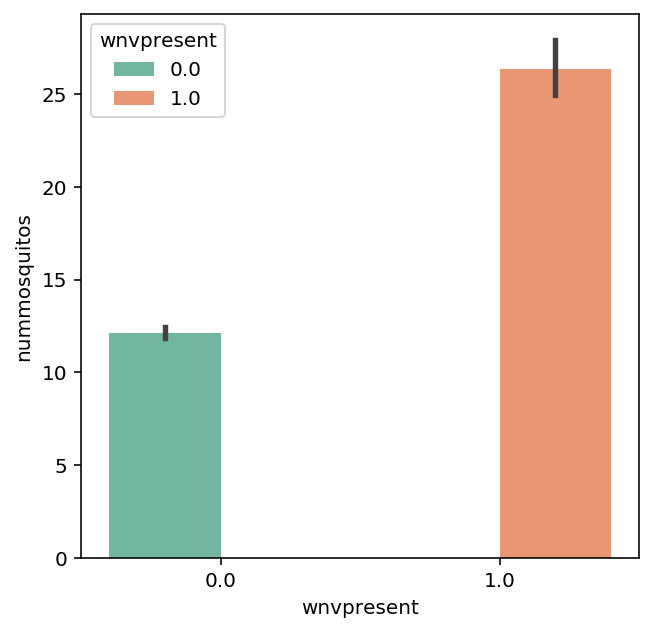

In [8]:
# Plot to check the presence of WNV vs number of mosquitoes 
# As the number of mosquitoes is higher, the number of mosquitoes with wnv is higher 

plt.subplots(figsize= (5,5))
ax = sns.barplot('wnvpresent', 'nummosquitos', data=train, 
                 hue = 'wnvpresent', palette='Set2' )

Text(0.5, 1.03, 'Count of target')

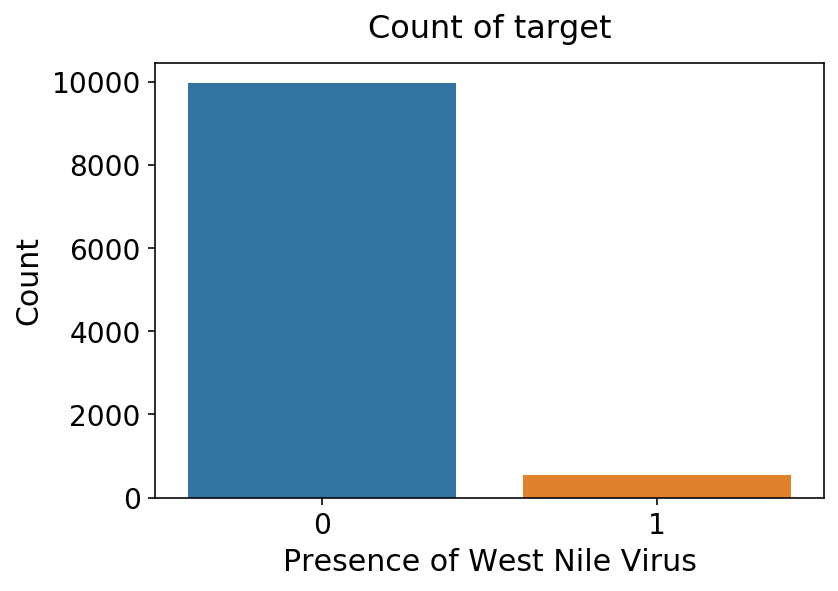

In [9]:
# Plot the presense of WNV

sns.barplot(x=[0,1], y=train.wnvpresent.value_counts())
plt.xlabel('Presence of West Nile Virus', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tick_params(labelsize=14)
plt.title('Count of target',fontsize=16, y=1.03)

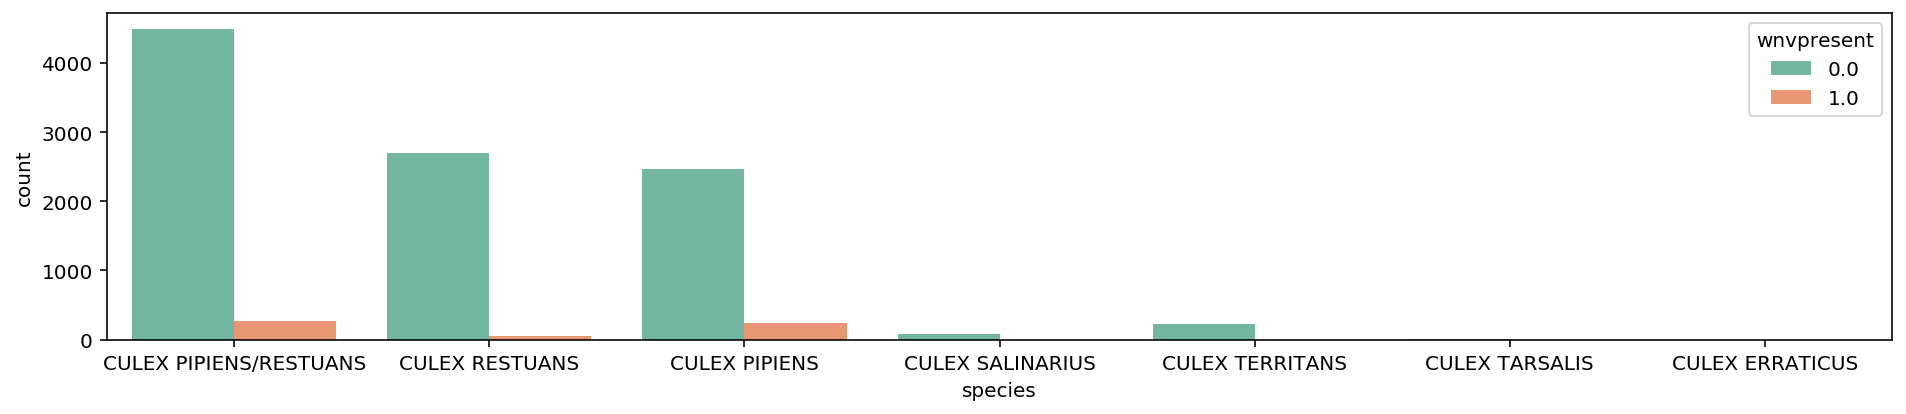

In [10]:
# Plot the species of mosquitoes vs the presence of WNV
# It seems onli the first 3 species account for the wnv mozzies

plt.subplots(figsize=(16,3))
ax =sns.countplot('species', data=train, 
                  hue='wnvpresent', palette='Set2')

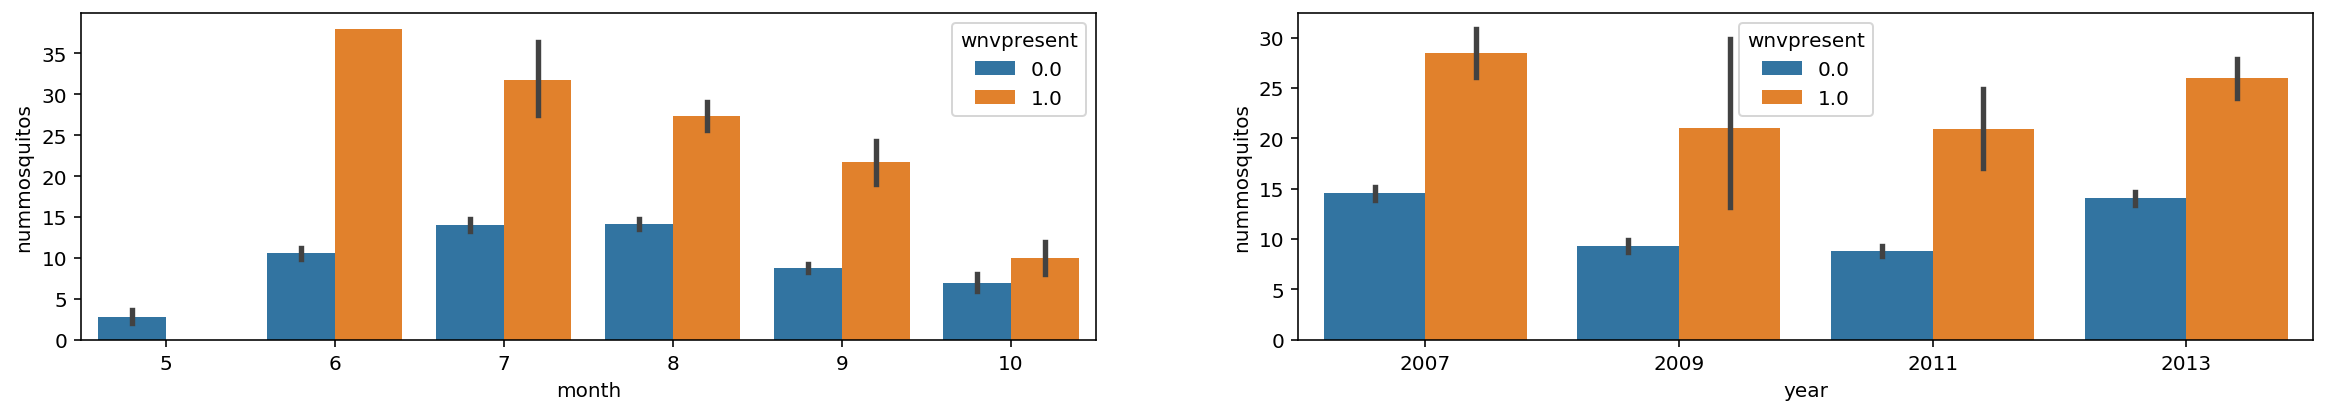

In [11]:
# The first plot shows the number of mosquitos peaked in June and reduced as the summer progresses.
# The second plot shows 2007 has the highest number of wnv cases perhaps due to ideal conditions
# that led to more mosquitos being bred.

plt.subplots(figsize=(20,3))
plt.subplot(1,2,1),sns.barplot('month','nummosquitos',data=train,hue='wnvpresent');
plt.subplot(1,2,2),sns.barplot('year','nummosquitos',data=train,hue='wnvpresent');

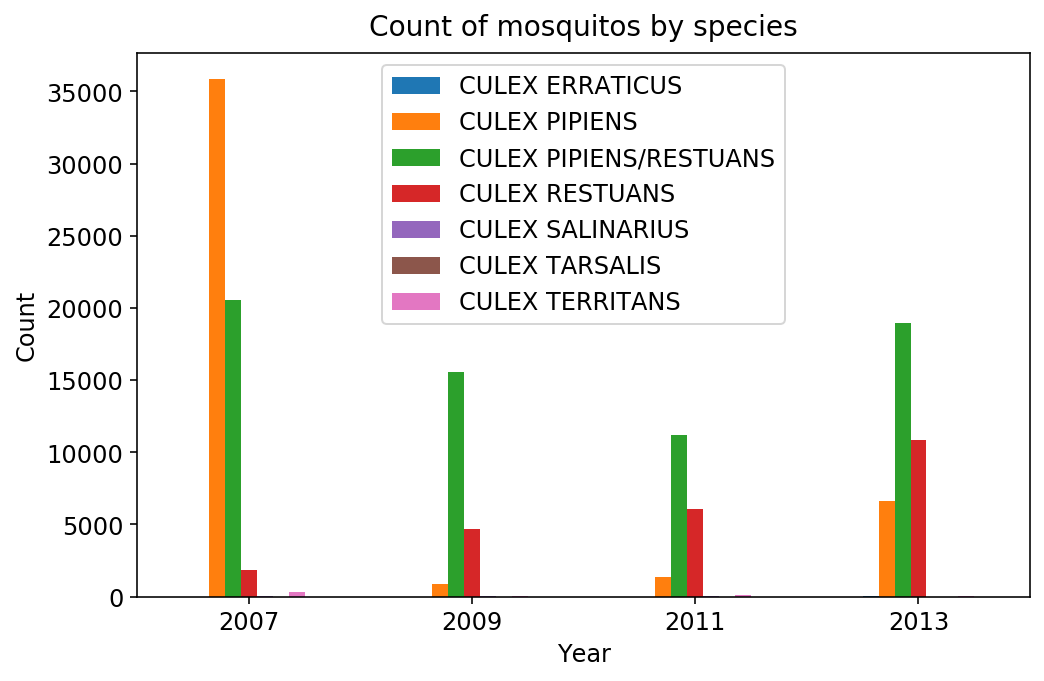

In [12]:
# To add on to the observations above.

# Most common species of mosquitos caught are Culex Pipiens and Culex Restuans
# Proportion of each species are the same except for 2007


train.groupby(['year','species']).nummosquitos.sum().unstack(fill_value=0).plot.bar(figsize=(8,5))
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Count of mosquitos by species', fontsize=14, y=1.01)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend(fontsize=12)

Text(0, 0.5, 'Count')

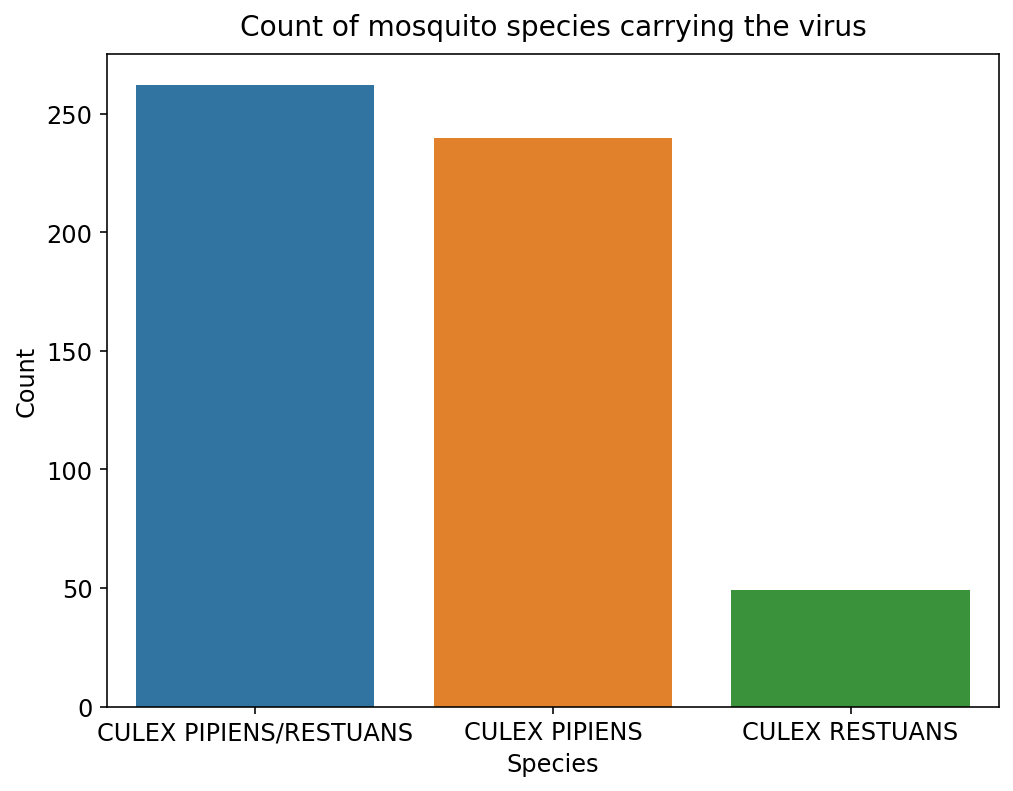

In [13]:
# See which mozzie brings WNV


plt.figure(figsize=(8,6))
sns.countplot(train[train['wnvpresent']==1].species)
plt.title('Count of mosquito species carrying the virus', fontsize=14, y=1.01)
plt.tick_params(labelsize=12)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)

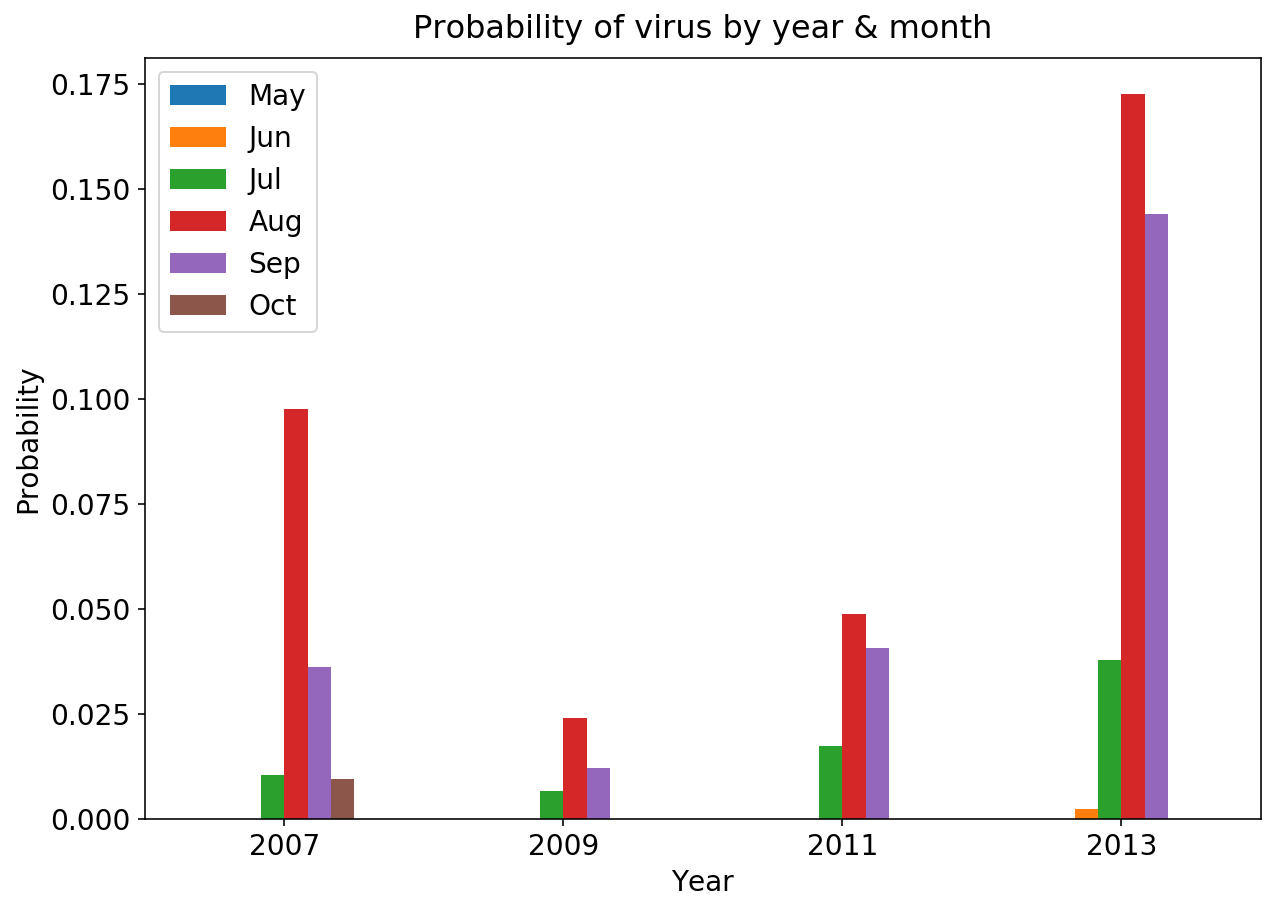

In [14]:
# See the distribution of WNV by months in the years

# Seems like there is more likelyhood of WNV present in August.

train.groupby(['year','month']).wnvpresent.mean().unstack(fill_value=0).plot.bar(figsize=(10,7))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Probability of virus by year & month', fontsize=16, y=1.01)
plt.ylabel('Probability', fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.legend(labels = ('May', 'Jun', 'Jul', 'Aug', 'Sep','Oct'),fontsize=14)



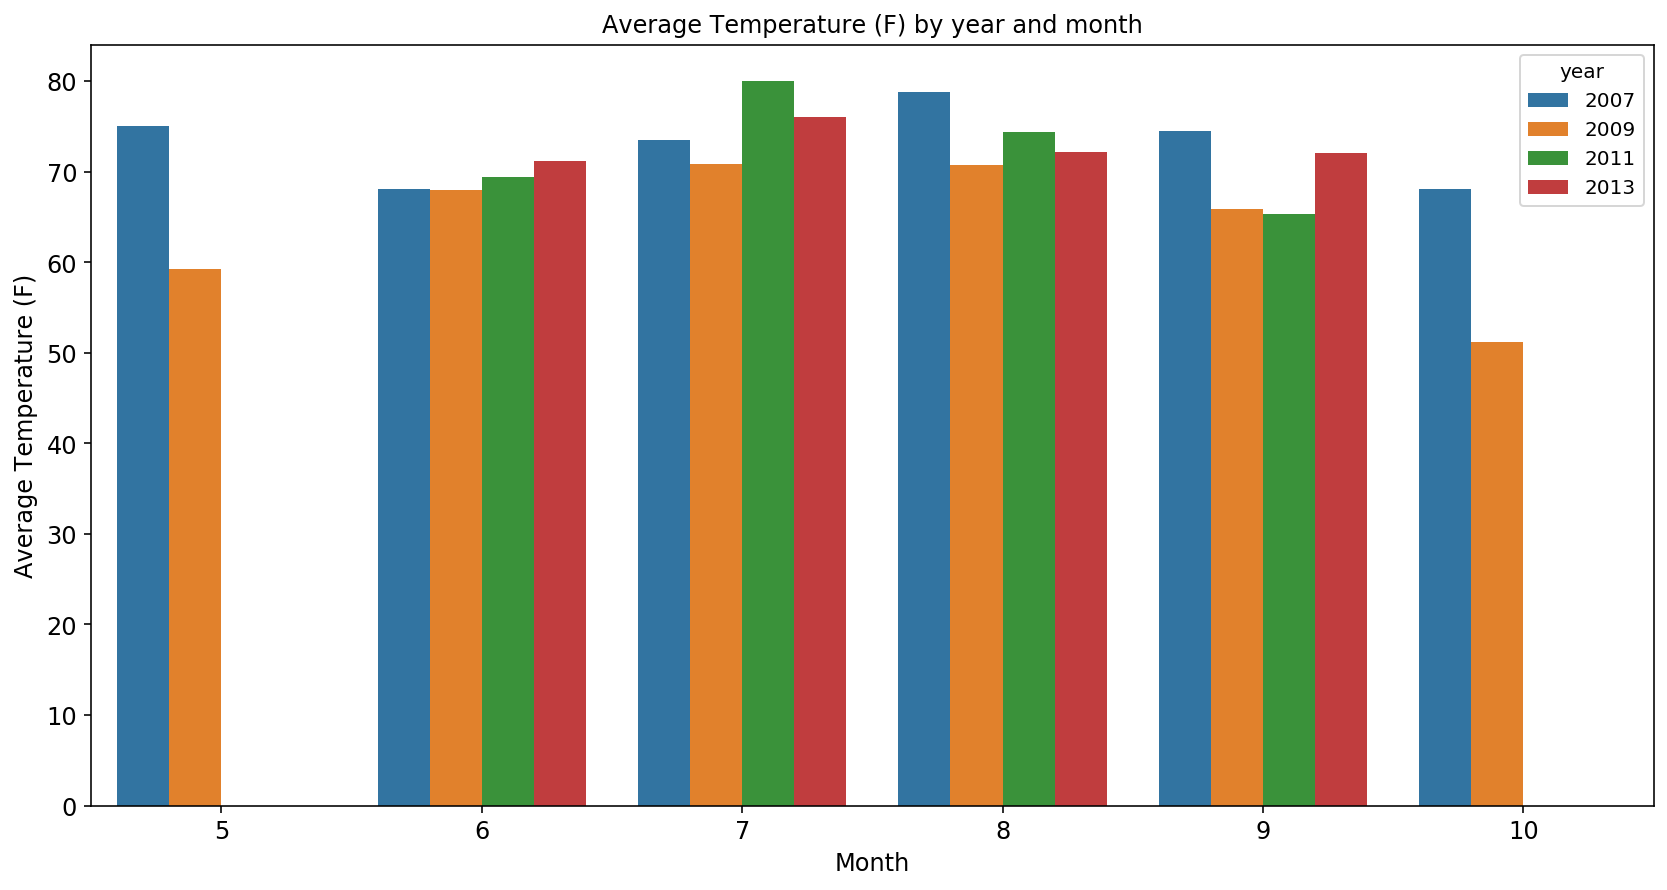

In [15]:
# plot the temperature to see any correlation to the observations above

plt.figure(figsize=(14,7))

sns.barplot(data=train,x='month',y='tavg',hue='year', ci=None)
plt.title('Average Temperature (F) by year and month')
plt.ylabel('Average Temperature (F)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.tick_params(labelsize=12)

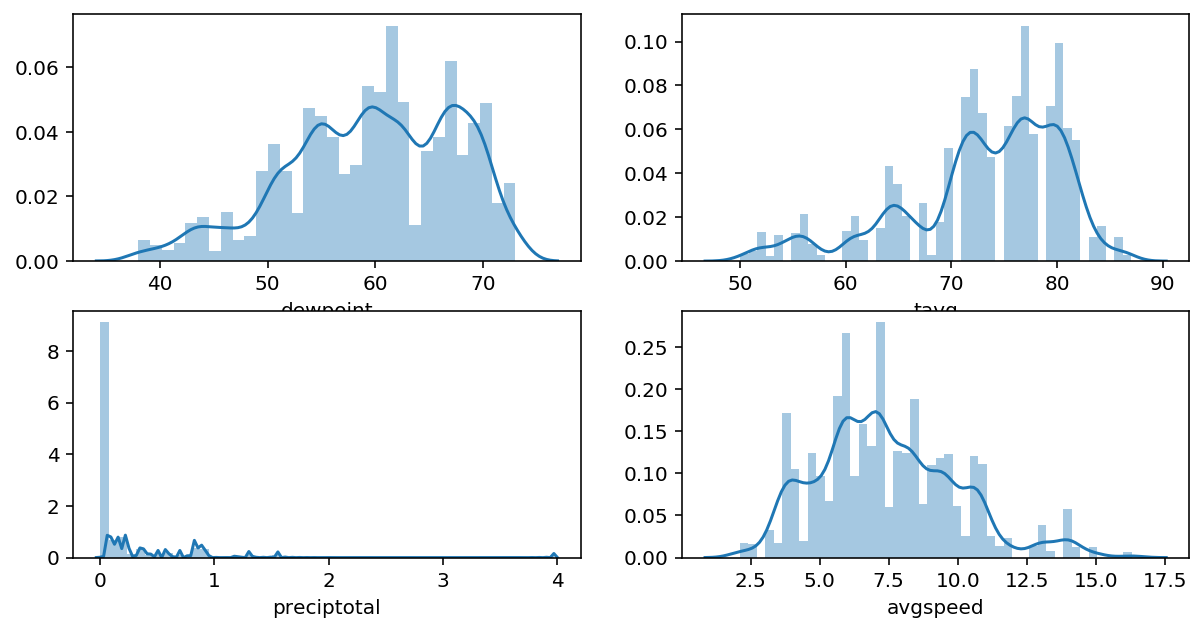

In [16]:
# Plot the distribution of dewpoint and temperature

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax = ax.ravel()

sns.distplot(train.dewpoint, ax=ax[0])
sns.distplot(train.tavg, ax = ax[1])
sns.distplot(train.preciptotal, ax = ax[2])
sns.distplot(train.avgspeed, ax = ax[3])

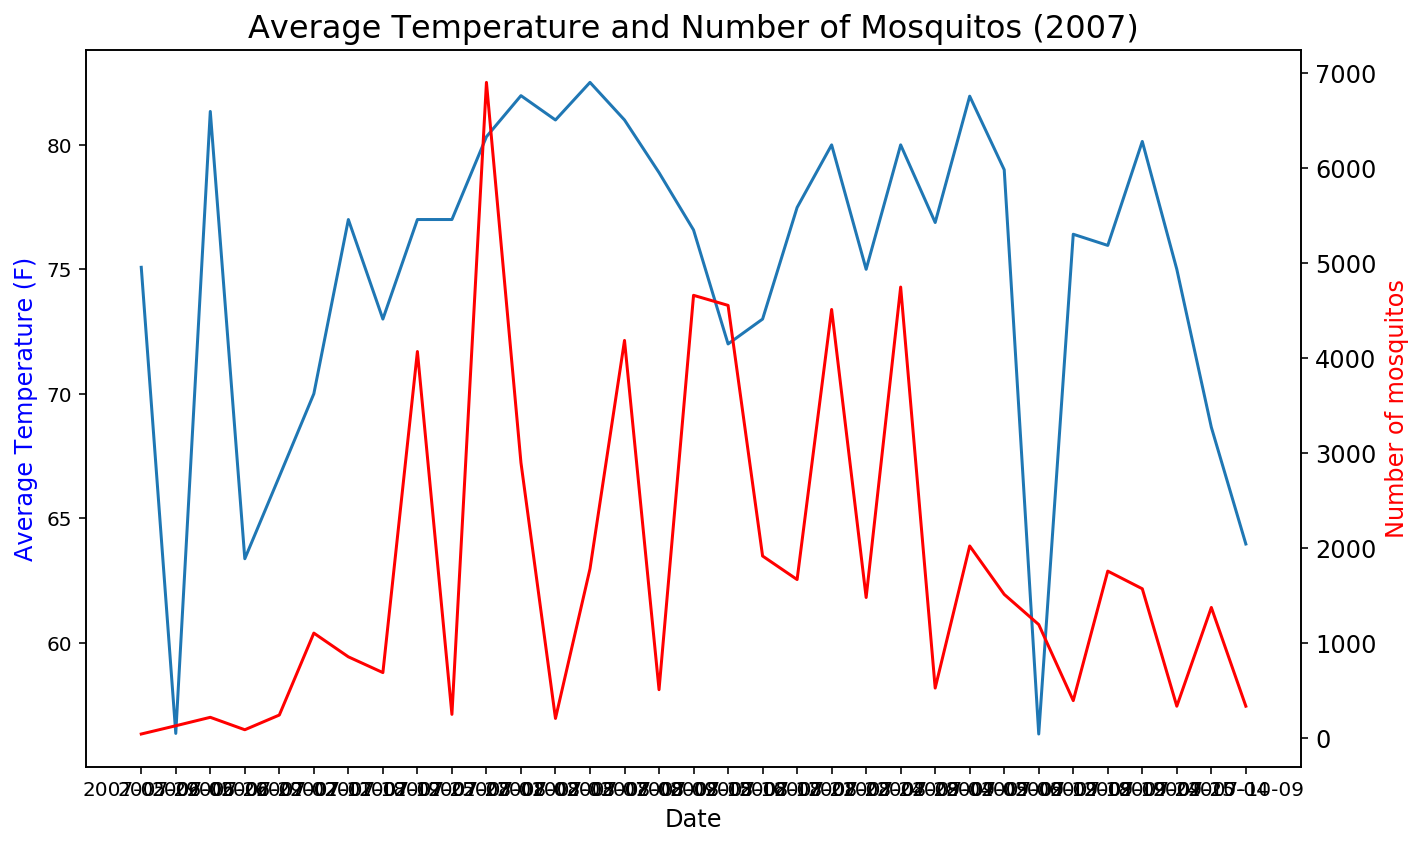

In [17]:
# Plot the temperature and number of mossies to see if they have correlation

fig, ax1 = plt.subplots(figsize=(10,6))

sns.lineplot(x=train[train['year'] == 2007].date, y=train[train['year'] == 2007].tavg, ci=None, ax=ax1)

ax1.set_ylabel('Average Temperature (F)', color='blue', fontsize=12)
ax1.set_xlabel('Date', fontsize=12)
ax1.tick_params(labelsize=10)

mossie = train[train['year'] == 2007].groupby(['date']).nummosquitos.sum()
df_mossie = pd.DataFrame(mossie)

ax2 = ax1.twinx()
sns.lineplot(x=df_mossie.index, y=df_mossie.nummosquitos, ci=None, ax=ax2, color='red')
ax2.set_ylabel('Number of mosquitos', color='r', fontsize=12)
ax2.tick_params(labelsize=12)

plt.title('Average Temperature and Number of Mosquitos (2007)', fontsize=16)
fig.tight_layout()

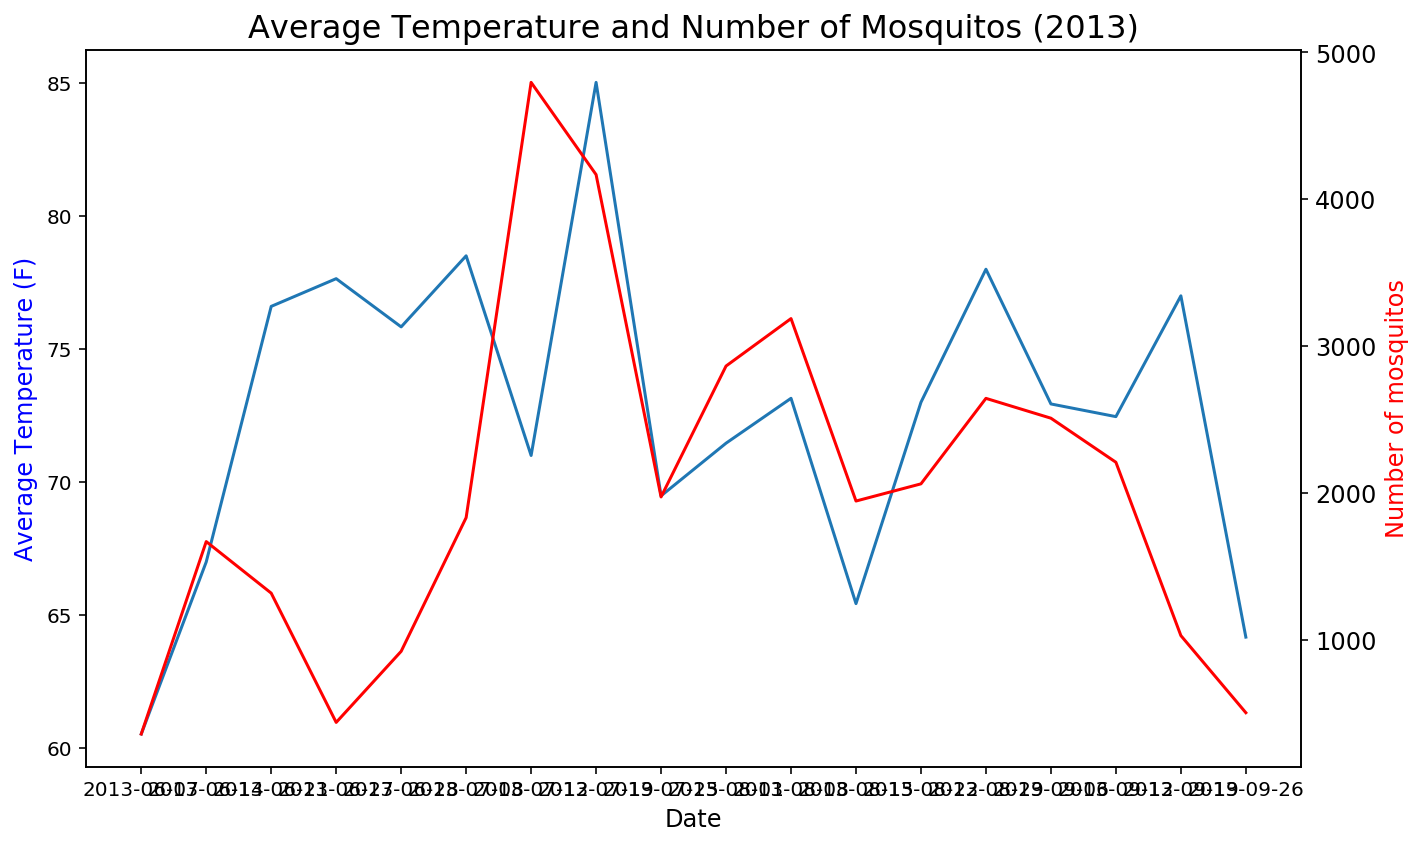

In [18]:
fig, ax1 = plt.subplots(figsize=(10,6))

sns.lineplot(x=train[train['year'] == 2013].date, y=train[train['year'] == 2013].tavg, ci=None, ax=ax1)

ax1.set_ylabel('Average Temperature (F)', color='blue', fontsize=12)
ax1.set_xlabel('Date', fontsize=12)
ax1.tick_params(labelsize=10)

mossie = train[train['year'] == 2013].groupby(['date']).nummosquitos.sum()
df_mossie = pd.DataFrame(mossie)

ax2 = ax1.twinx()
sns.lineplot(x=df_mossie.index, y=df_mossie.nummosquitos, ci=None, ax=ax2, color='red')
ax2.set_ylabel('Number of mosquitos', color='r', fontsize=12)
ax2.tick_params(labelsize=12)

plt.title('Average Temperature and Number of Mosquitos (2013)', fontsize=16)
fig.tight_layout()

#### Seasonal Mean Temperature taken from https://www.weather.gov/lot/Chicago_summer_temps
Seasonal Mean Temperature - Normal 71.8 F
<br>
2007	73.3 F <br>
2009	69.2 F <br>
2010	75.2 F <br>
2011	74.0 F <br>
2012	76.1 F <br>
2013	71.6 F <br>

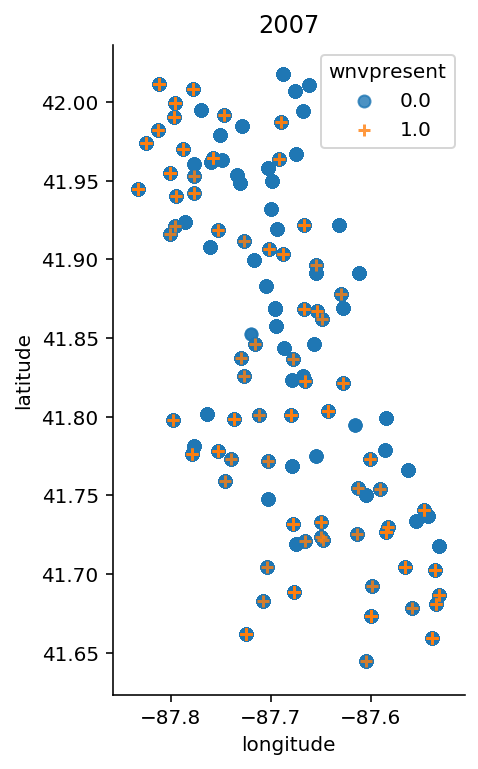

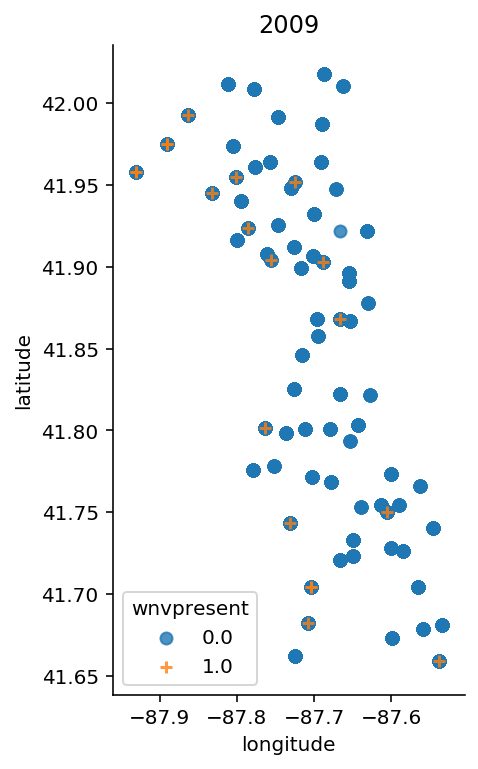

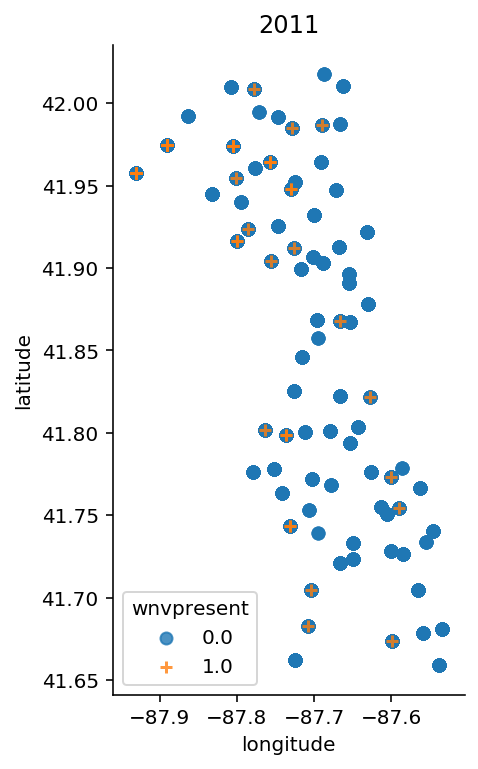

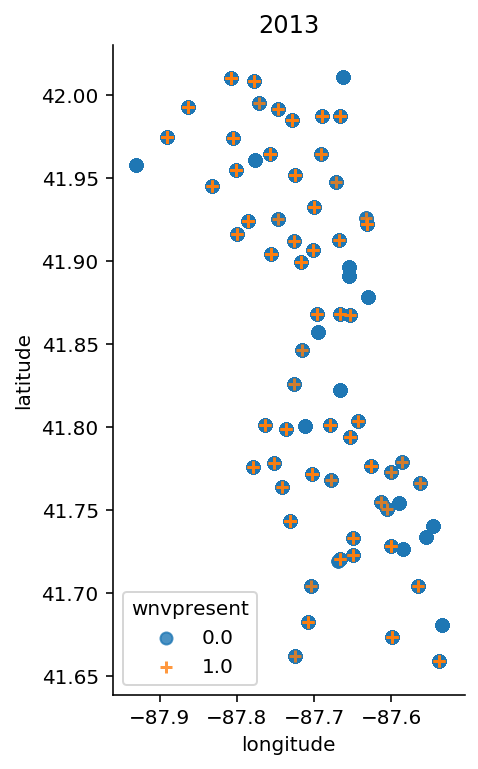

In [20]:
# Plot scatter plot to visualize the presence of wnv for years or months.

def scatterplot(wnvperiod, title):
    sns.lmplot('longitude','latitude',data=wnvperiod,hue='wnvpresent',fit_reg=False,markers=['o','+'],height=7.5,aspect=0.71, legend_out=False)
    fig = plt.gcf()
    fig.set_size_inches(3,5)
    plt.title(title)

# Plot alternate years from 2007 - 2013
for y in range(2007, 2015, 2):
    wnvyear = train[train['year'] == y]
    scatterplot(wnvyear, y)

In [22]:
#pick only numerical columns to plot heatmap
num_df =  train.select_dtypes(include =['float64','int64'])
num_df.shape

(10506, 26)

In [24]:
#push both num and wnv to the bottom so its easier to see 

new_col= ['block',
 'latitude',
 'longitude',
 'addressaccuracy',
 'id',
 'station',
 'tmax',
 'tmin',
 'tavg',
 'depart',
 'dewpoint',
 'wetbulb',
 'heat',
 'cool',
 'sunrise',
 'preciptotal',
 'stnpressure',
 'sealevel',
 'resultspeed',
 'resultdir',
 'avgspeed',
 'year',
 'month',
 'day',
 'nummosquitos',
 'wnvpresent',]

In [25]:
# Re-arrage columns in df

num_df = num_df[new_col]

In [26]:
num_df.head()

block   latitude  longitude  addressaccuracy  id  station  tmax  tmin  \
0     41  41.954690 -87.800991                9 NaN        1    88    60   
1     41  41.954690 -87.800991                9 NaN        1    88    60   
2     62  41.994991 -87.769279                9 NaN        1    88    60   
3     79  41.974089 -87.824812                8 NaN        1    88    60   
4     79  41.974089 -87.824812                8 NaN        1    88    60   

   tavg  depart  dewpoint  wetbulb  heat  cool  sunrise  preciptotal  \
0  74.0    21.0        58     65.0     0     9      421          0.0   
1  74.0    21.0        58     65.0     0     9      421          0.0   
2  74.0    21.0        58     65.0     0     9      421          0.0   
3  74.0    21.0        58     65.0     0     9      421          0.0   
4  74.0    21.0        58     65.0     0     9      421          0.0   

   stnpressure  sealevel  resultspeed  resultdir  avgspeed  year  month  day  \
0        29.39     30.11          5.8         18       6.5  2007      5   29   
1        29.39     30.11          5.8         18       6.5  2007      5   29   
2        29.39     30.11          5.8         18       6.5  2007      5   29   
3        29.39     30.11          5.8         18       6.5  2007      5   29   
4        29.39     30.11          5.8         18       6.5  2007      5   29   

   nummosquitos  wnvpresent  
0           1.0         0.0  
1           1.0         0.0  
2           1.0         0.0  
3           1.0         0.0  
4           4.0         0.0

In [27]:
num_df.drop('id', axis = 1, inplace=True)

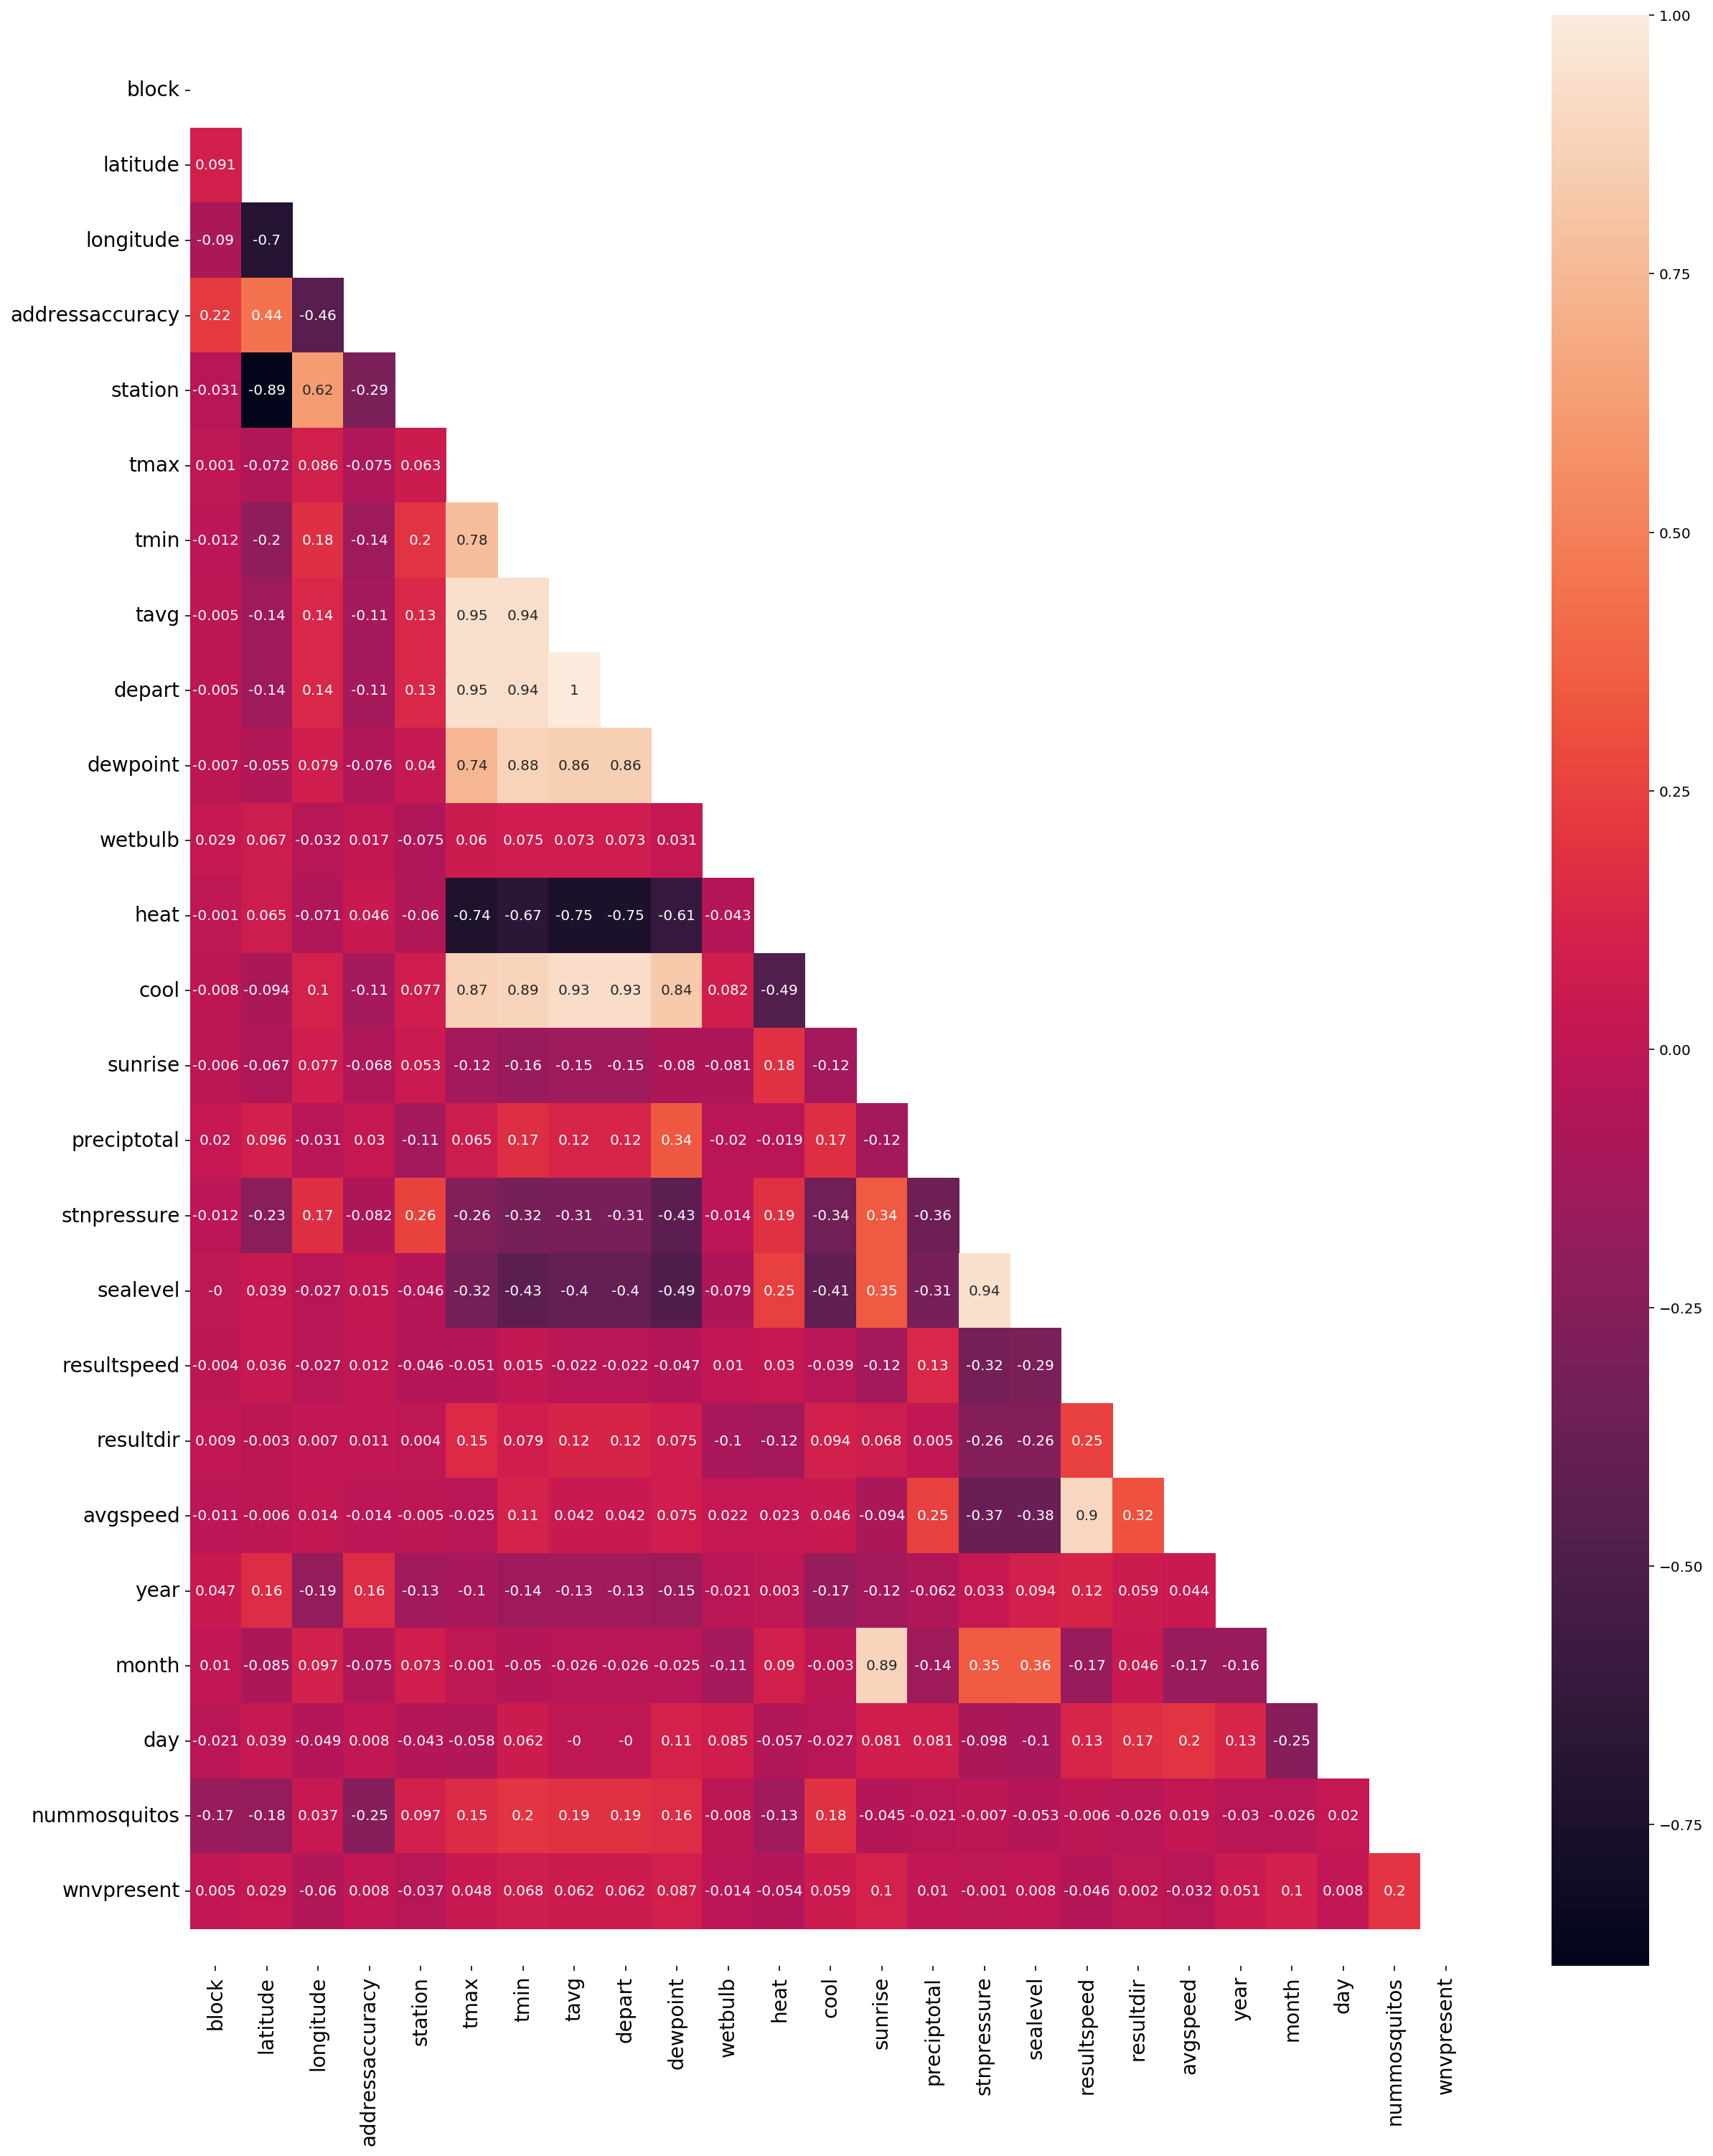

In [28]:
# Plot heat map for all numerical variables in train 

corr=round(num_df.corr(),3)

fix, ax = plt.subplots(figsize=(20,25))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #triu triangle upper

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr,mask=mask, ax=ax, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, va="center")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

There are not many variables correlating to number of mosquitos (nummosquitoes) and wnvpresent

There is nothing much to explore in categorical variables except species

In [38]:
float_df =  train.select_dtypes(include =['float64'])
float_df.drop('id', axis = 1, inplace=True)
float_df.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(10506, 12)

In [39]:
float_df.columns

Index(['latitude', 'longitude', 'nummosquitos', 'wnvpresent', 'tavg', 'depart',
       'wetbulb', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'avgspeed'],
      dtype='object')

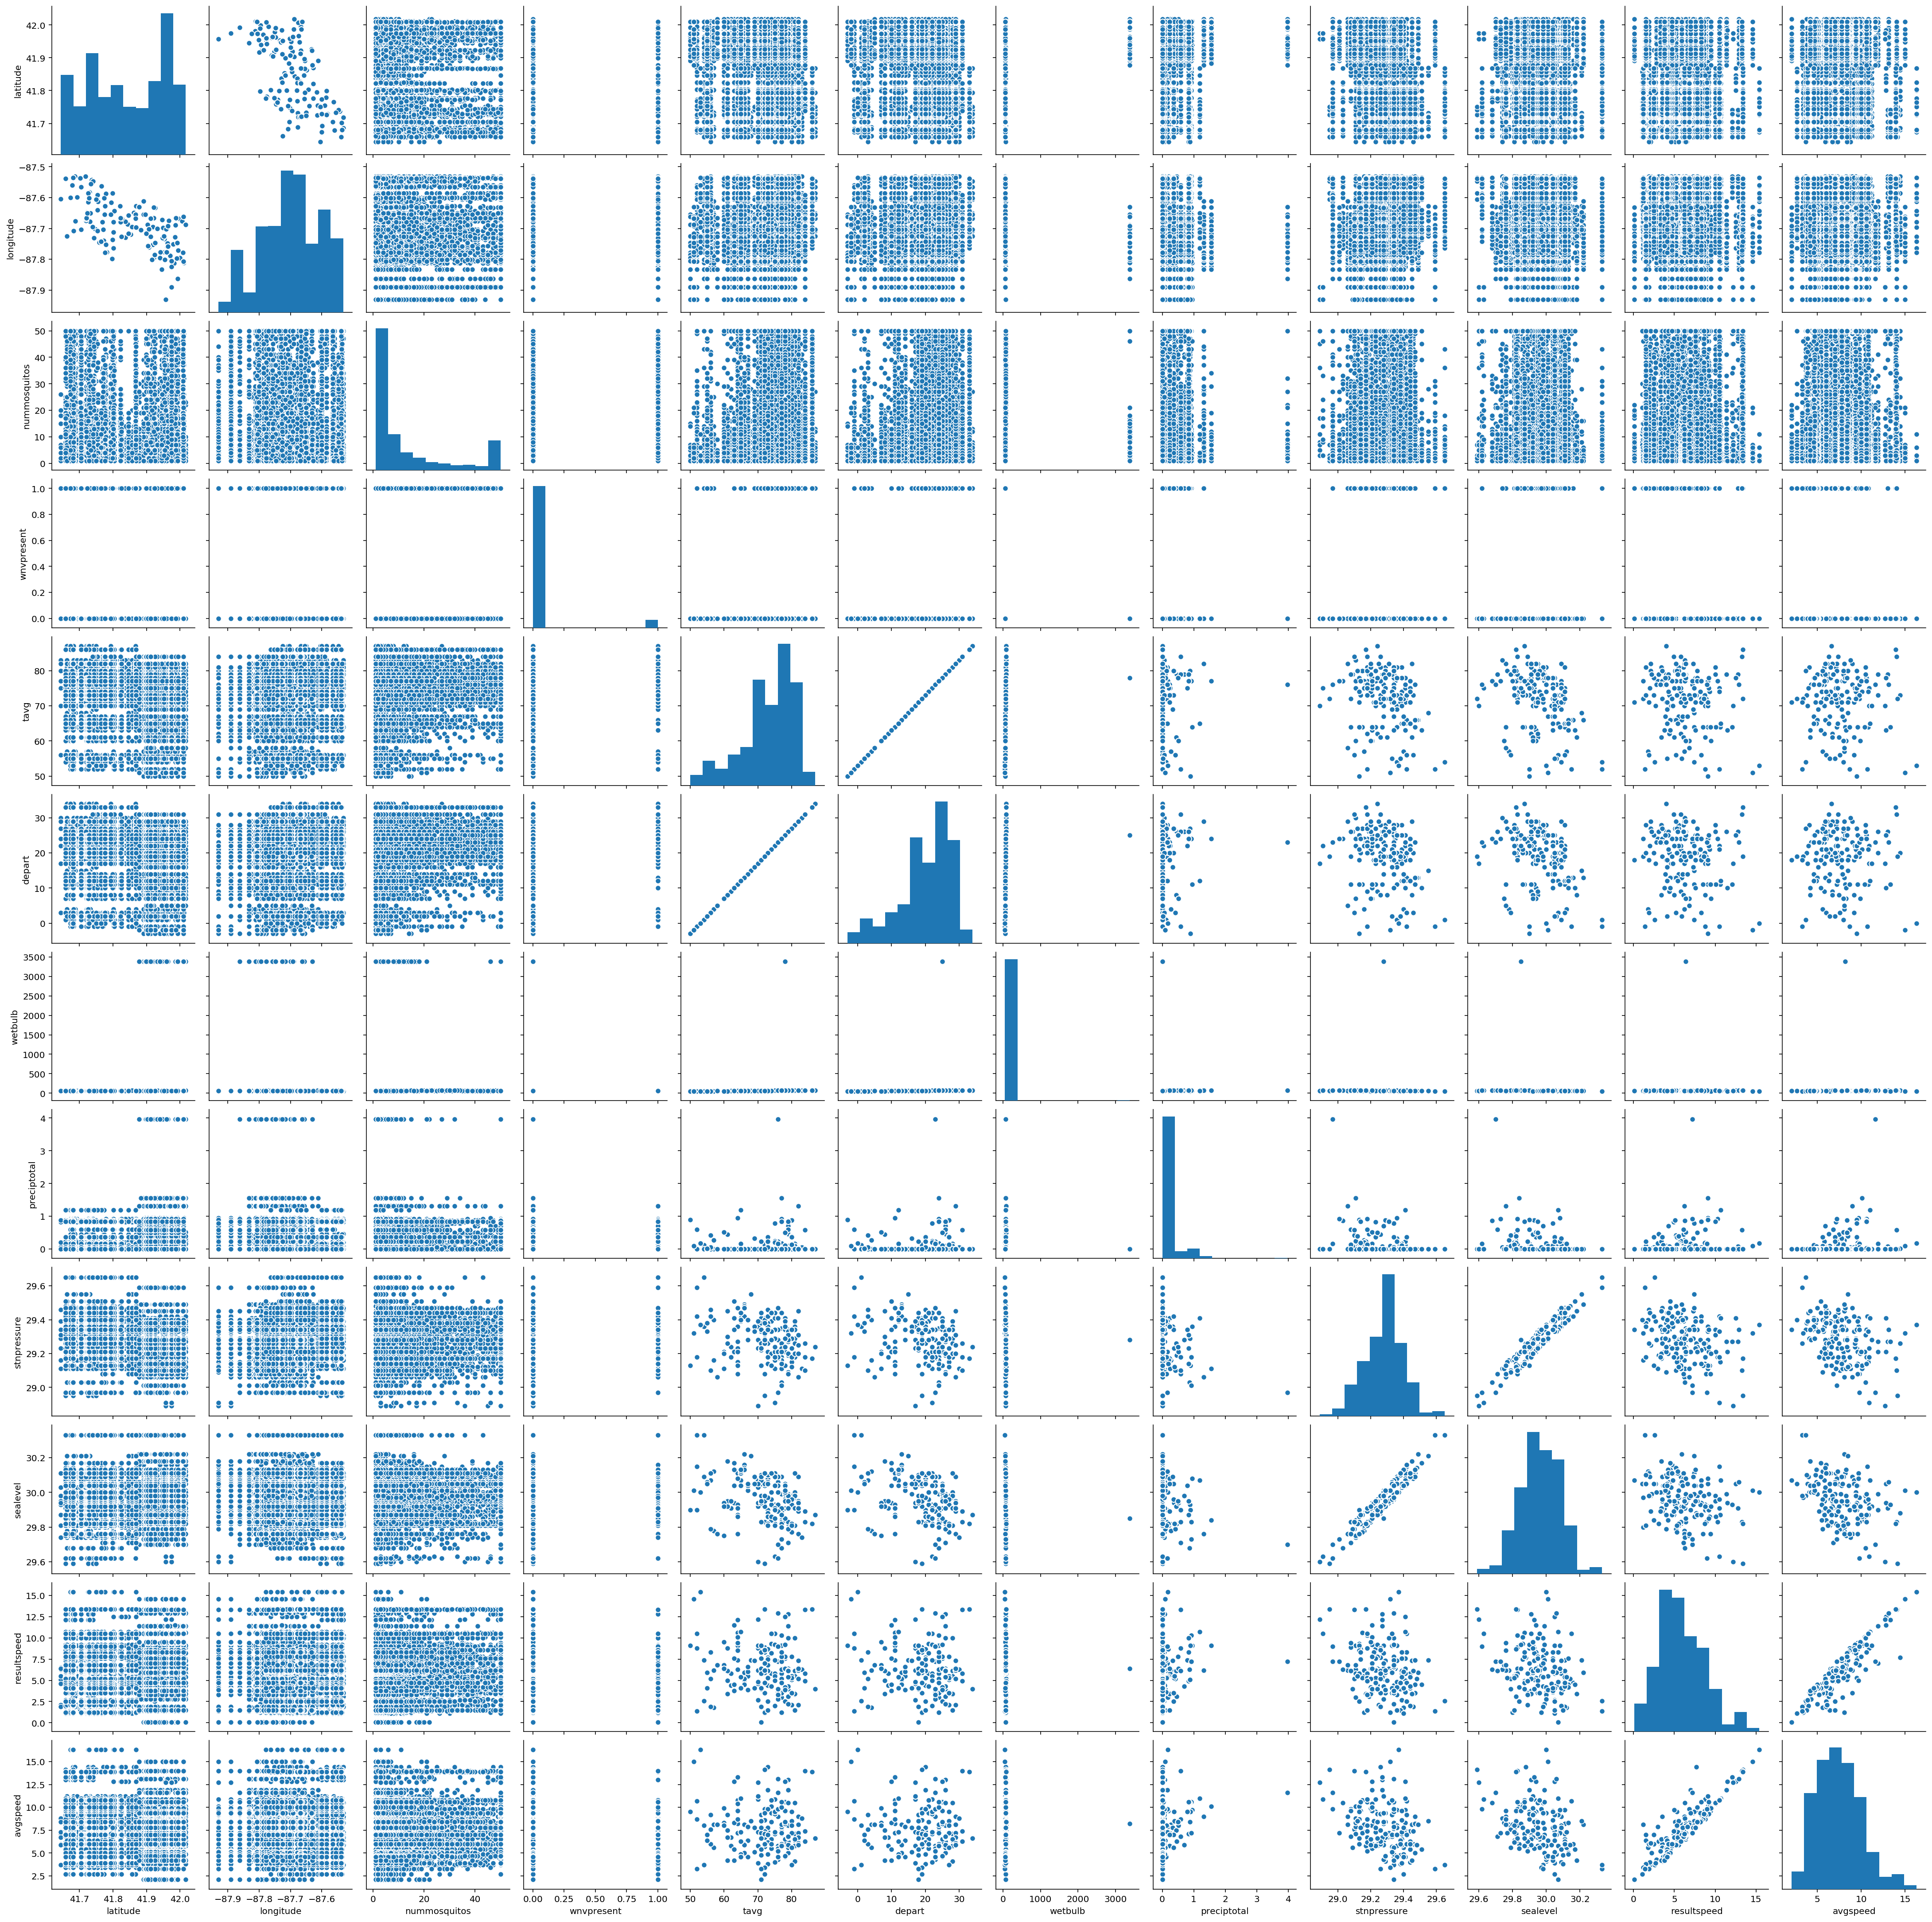

In [40]:
# Pairplot

ax=sns.pairplot(float_df) 

In [29]:
# Let's explore a bit more to see what results we can get from a simple K-Nearest Neighbor model before using 'amped' models 
# Train Test Split the dataframe 'num_df' with numerical data only.

X_train, X_test, y_train, y_test = train_test_split(num_df.drop('wnvpresent',1),num_df['wnvpresent'],test_size=0.2,random_state=42,stratify=num_df['wnvpresent'])

In [30]:
# A quick check of the train test split datasets

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8404, 24)
(2102, 24)
(8404,)
(2102,)


#### Running K-nearest neighbors model, 25 times with 25 different Ks to see the effect on accuracy, precision and recall 

In [31]:
recscore = []
accurscore = []
prescore = []
prd = []
k = list(range(1,25))

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    yypred = knn.predict(X_test)
    prd.append(yypred)
    prescore.append(precision_score(yypred, y_test))
    recscore.append(recall_score(yypred, y_test))
    accurscore.append(accuracy_score(yypred, y_test))

array([[1979,  102],
       [  13,    8]], dtype=int64)

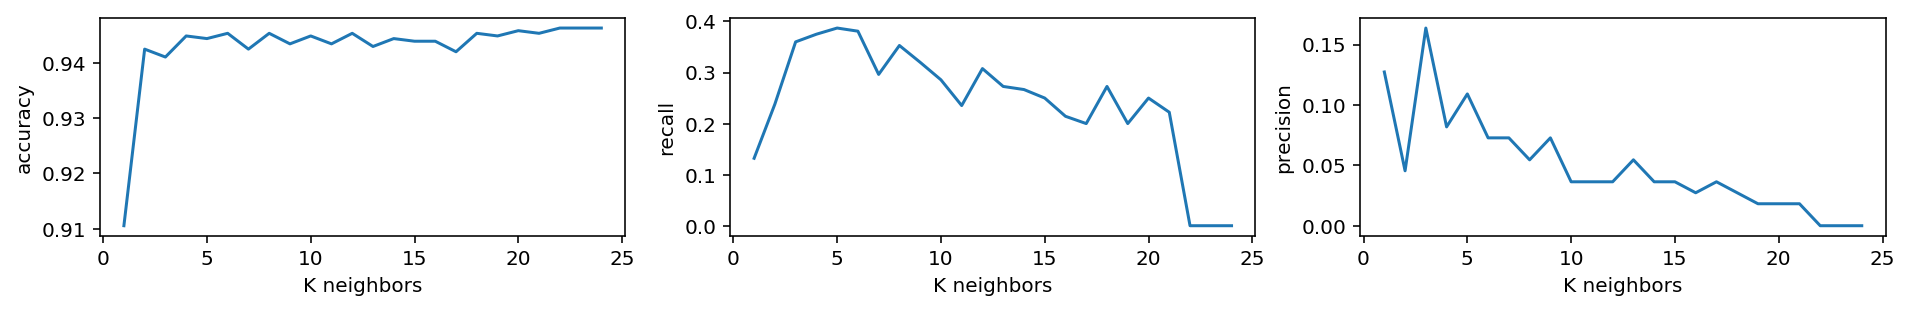

In [32]:
# Plot the K-depended results of the metrics

plt.subplots(figsize=(16,2))
met={'accuracy':accurscore,'recall':recscore,'precision':prescore}
for num,key in enumerate(met):
    plt.subplot(1, 3, num+1)
    plt.plot(k, met[key])
    plt.xlabel('K neighbors')
    plt.ylabel(key)

confusion_matrix(prd[5], y_test)

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, prd[5]).ravel()
print(f'True Negatives: {tn:42}')
print(f'False Positives (predicted +ve but it turns out -ve): {fp:4}')
print(f'False Negatives: (predicted +ve but it turns out -ve): {fn}')
print(f'True Positives: {tp:42}')

True Negatives:                                       1979
False Positives (predicted +ve but it turns out -ve):   13
False Negatives: (predicted +ve but it turns out -ve): 102
True Positives:                                          8


#### Top Left Plot
- Accuracy starts really high and goes even higher when increasing the bias (i.e.”generalizing” the model, by using even higher kNeighbors). This is typical for an imbalanced dataset (virus occurrences are rare -> WNV=1 is 5%).
- Because of the scarcity of incidence of WMV, the model is not better than a “dumb” model of predicting WNV=0 (“No Virus”) every time.

#### Top Middle and Right
We can see that when we increase the bias (Ks) recall is improving peaking at k=5 but that’s at the expense of precision that drops to around 4% at K=10

#### Matrix
This tradeoff is typical. When K=5 we have 13 case of FP and 8 cases of TP which makes the recall peak at 39% but with 102 cases of FN this gives a very low precision ~4%, so the model is sensitive but is entirely not precise

In [34]:
# A quick look at the KNN scores for train and test.

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
predict = knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9500237981913374
0.9448144624167459
